# Receive Renovar API Data

## Constants and imports

### Imports

In [1]:
from SensorData import SensorData
from GetSensorDataService import GetSensorDataService
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Sensors IDs

In [2]:
TEMPERATURE_ID     =  130
PRESSURE_ID        =  131
ALPHA_CO_ID        =  132
ALPHA_NO2_ID       =  133
ALPHA_SO2_1_ID     =  134
ALPHA_OX_1_ID      =  135
ALPHA_OX_2_ID      =  136
ALPHA_SO2_2_ID     =  137
EXT_TEMPERATURE_ID =  138
EXT_HUMIDITY_ID    =  139
PM10_ID            =  140
PM25_ID            =  141
PM01_ID            =  142
OPC_TEMPERATURE_ID =  143
OPC_HUMIDITY_ID    =  144

### Sensor Constants

In [3]:
M = 1e3/0.0409 # Essa valor anula a conversão

### API Constants

In [4]:
HOST = "renovar.lcqar.ufsc.br"
PORT = 8080
GET_SAMPLES_BY_SENSOR = "/sample/sensor/all/"
HTTP_REQUEST_MAIN = 'http://' + HOST + ':' + str(PORT) + GET_SAMPLES_BY_SENSOR

# Alphasense PM1 Sensor Data

In [6]:
get_sensor_data_service = GetSensorDataService(HOST, PORT, GET_SAMPLES_BY_SENSOR)
sensor_data = get_sensor_data_service.get_data_from_file("data/raw-data-monit-fix-2022-2023-Diamante/OPC_PM1.CSV",
                                                         sensor_name='alpha_pm_1_conc')
sensor_data

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/GetSensorDataService.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DateTime'] = (pd.to_datetime(df[date_time_col], infer_datetime_format=False, format='%d/%m/%Y/%H/%M/%S'))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,-9999.99,2022-11-21 10:46:13
1,-28.456899,-48.972999,-9999.99,2022-11-21 11:01:57
2,-28.456899,-48.972999,-9999.99,2022-11-21 11:17:47
3,-28.456899,-48.972999,-9999.99,2022-11-21 11:33:31
4,-28.456899,-48.972999,-9999.99,2022-11-21 11:49:11
...,...,...,...,...
11663,-28.456899,-48.972999,0.04,2023-04-21 20:43:44
11664,-28.456899,-48.972999,0.04,2023-04-21 20:58:43
11665,-28.456899,-48.972999,0.01,2023-04-21 21:13:43
11666,-28.456899,-48.972999,-9999.99,2023-04-21 21:28:42


In [7]:
pm1_conc_data = SensorData(PM01_ID, sensor_name='alpha_pm_1_conc', lower_limit=0.0, upper_limit=20e6, 
                                t_90=1, t_90_value=20e6, sampling_period=15 * 60, 
                                get_service=get_sensor_data_service, molar_mass=M)

## Upload Data from File

In [8]:
pm1_conc_data.read_from_csv()
pm1_conc_data.web_dataframe

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorData.py:134: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  self.web_dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,-9999.99,2022-11-21 10:46:13
1,-28.456899,-48.972999,-9999.99,2022-11-21 11:01:57
2,-28.456899,-48.972999,-9999.99,2022-11-21 11:17:47
3,-28.456899,-48.972999,-9999.99,2022-11-21 11:33:31
4,-28.456899,-48.972999,-9999.99,2022-11-21 11:49:11
...,...,...,...,...
11663,-28.456899,-48.972999,0.04,2023-04-21 20:43:44
11664,-28.456899,-48.972999,0.04,2023-04-21 20:58:43
11665,-28.456899,-48.972999,0.01,2023-04-21 21:13:43
11666,-28.456899,-48.972999,-9999.99,2023-04-21 21:28:42


## Tag data

In [9]:
pm1_conc_data.tag_and_prepare_data()
pm1_conc_data.sensor_dataframe.head()

,latitude,longitude,measuring,Tag,Diff,value
DateTime,,,,,,
2022-11-21 10:45:00,-28.456899,-48.972999,-9999.99,MISSING,NaN,-9999.99
2022-11-21 11:00:00,-28.456899,-48.972999,-9999.99,MISSING,0.0,-9999.99
2022-11-21 11:15:00,-28.456899,-48.972999,-9999.99,MISSING,0.0,-9999.99
2022-11-21 11:30:00,-28.456899,-48.972999,-9999.99,MISSING,0.0,-9999.99
2022-11-21 11:45:00,-28.456899,-48.972999,-9999.99,MISSING,0.0,-9999.99


### Data Tag contabilization

In [10]:
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID']
data_contabilization = sensor_analysis.count_tags(tags, pm1_conc_data.sensor_dataframe)
data_contabilization

,#,%
MISSING,4441,30.543329
LTLL,1,0.006878
GTUL,0,0.0
BADSPIKE,0,0.0
VALID,10098,69.449794
TOTAL,14540,100.0


### Plot raw data

<Axes: xlabel='DateTime'>

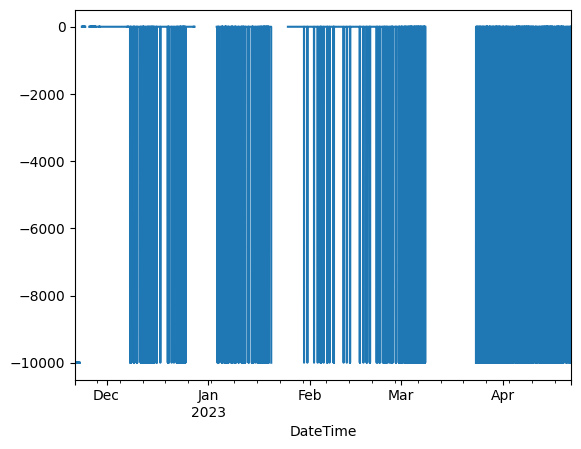

In [11]:
pm1_conc_data.sensor_dataframe['measuring'].plot()

### Plot Valid Data

<Axes: xlabel='DateTime'>

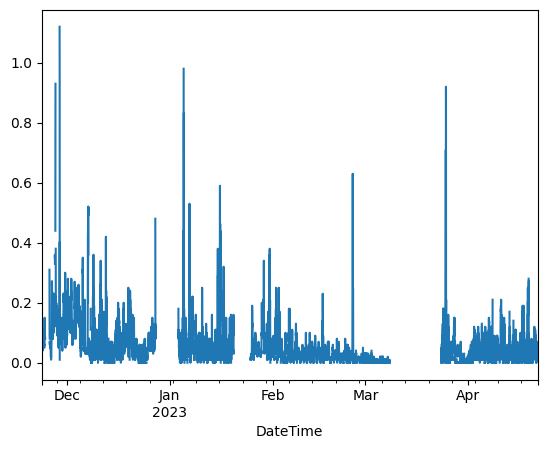

In [12]:
pm1_conc_data.sensor_dataframe[pm1_conc_data.sensor_dataframe['Tag'] == 'VALID']['measuring'].resample('15T').mean().plot()

### Plot raw derivatives

<Axes: xlabel='DateTime'>

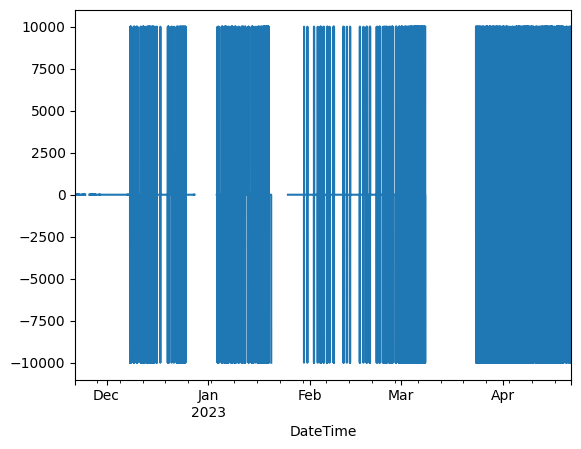

In [13]:
pm1_conc_data.sensor_dataframe['Diff'].resample('15T').mean().plot()

### Plot valid derivatives

<Axes: xlabel='DateTime'>

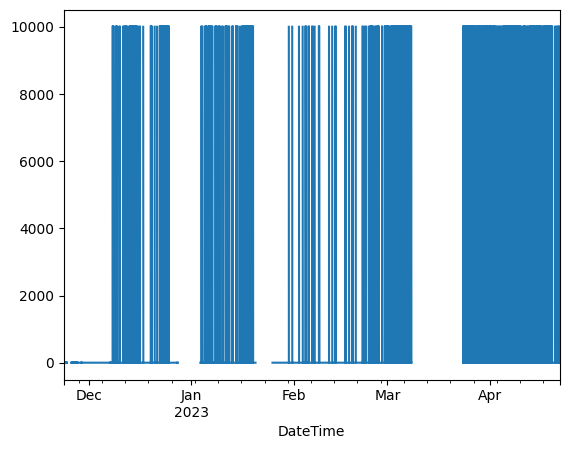

In [14]:
pm1_conc_data.valid_differential_series.resample('15T').mean().plot()

## Resampled data

In [15]:
pm1_conc_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag
DateTime,,,,,,,,,,
2022-11-23 11:30:00,-28.456899,-48.972999,0.166667,0.045,0.166667,11,3,0.045092,75.0,VALID
2022-11-23 12:30:00,-28.456899,-48.972999,0.207500,-0.015,0.207500,12,4,0.043493,100.0,VALID
2022-11-23 13:30:00,-28.456899,-48.972999,0.103333,-0.050,0.103333,13,3,0.050332,75.0,VALID
2022-11-23 14:30:00,-28.456899,-48.972999,0.050000,0.000,0.050000,14,4,0.000000,100.0,VALID
2022-11-23 15:30:00,-28.456899,-48.972999,0.062500,0.000,0.062500,15,4,0.009574,100.0,VALID


### Data contabilization

In [16]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, pm1_conc_data.sensor_dataframe_1hr)
data_contabilization

,#,%
LOWSAMPLES,1092,30.443267
VALID,2495,69.556733
TOTAL,3587,100.0


### Plot raw hourly data

<Axes: xlabel='DateTime'>

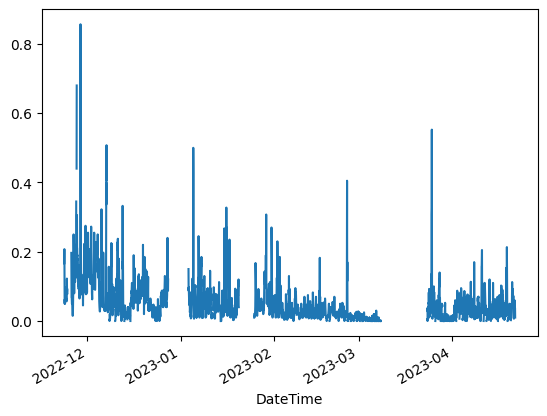

In [17]:
pm1_conc_data.sensor_dataframe_1hr['measuring'].plot()

### Plot valid hourly data

<Axes: xlabel='DateTime'>

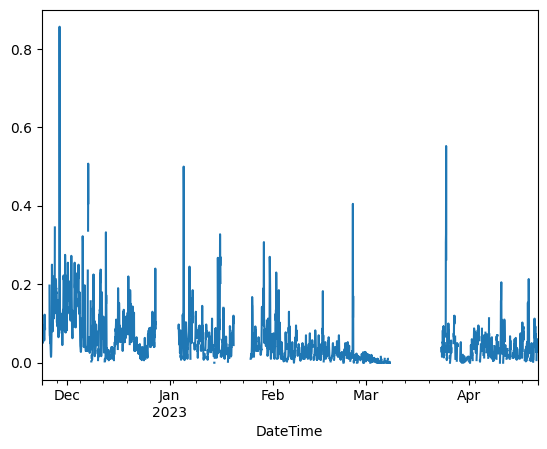

In [18]:
pm1_conc_data.sensor_dataframe_1hr[pm1_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']['measuring'].resample('H').mean().plot()

### Plot raw standard deviation

<Axes: xlabel='DateTime'>

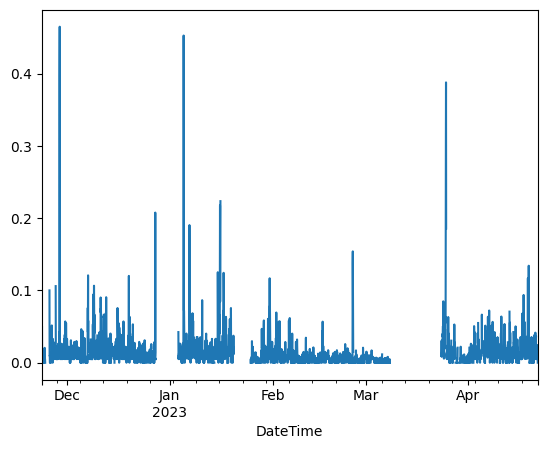

In [19]:
pm1_conc_data.sensor_dataframe_1hr['Std'].resample('H').mean().plot()

### Plot valid standard deviation

<Axes: xlabel='DateTime'>

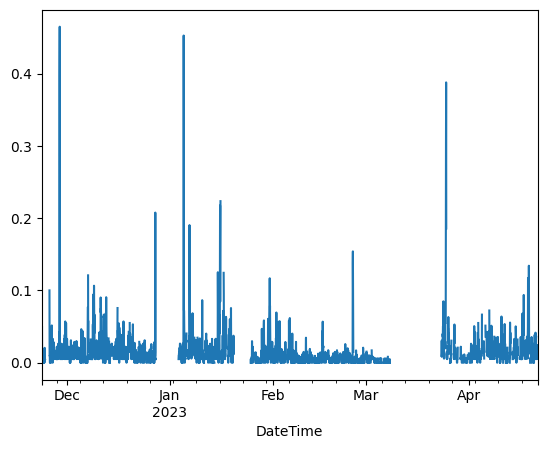

In [20]:
pm1_conc_data.sensor_dataframe_1hr[pm1_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']['Std'].resample('H').mean().plot()

## Calculate quantiles and tag data accordingly

### Calculate quantiles

In [21]:
pm1_conc_data.calculate_and_tag_quantiles()
pm1_conc_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99
DateTime,,,,,,,,,,,,
2022-11-23 11:30:00,-28.456899,-48.972999,0.166667,0.045,0.166667,11,3,0.045092,75.0,VALID,0.0000,0.2200
2022-11-23 12:30:00,-28.456899,-48.972999,0.207500,-0.015,0.207500,12,4,0.043493,100.0,VALID,0.0000,0.2750
2022-11-23 13:30:00,-28.456899,-48.972999,0.103333,-0.050,0.103333,13,3,0.050332,75.0,VALID,0.0000,0.2500
2022-11-23 14:30:00,-28.456899,-48.972999,0.050000,0.000,0.050000,14,4,0.000000,100.0,VALID,0.0000,0.2025
2022-11-23 15:30:00,-28.456899,-48.972999,0.062500,0.000,0.062500,15,4,0.009574,100.0,VALID,0.0025,0.1825


In [22]:
tags = ['LOWSAMPLES','VALID', 'LTQTLE01', 'GTQTLE99']
data_contabilization = sensor_analysis.count_tags(tags, pm1_conc_data.sensor_dataframe_1hr)
data_contabilization

,#,%
LOWSAMPLES,1092,30.443267
VALID,2382,66.406468
LTQTLE01,70,1.951491
GTQTLE99,43,1.198773
TOTAL,3587,100.0


## Process valid hourly data

In [23]:
valid_dataframe = (pm1_conc_data.sensor_dataframe_1hr[pm1_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']
                   .drop(columns=['Tag']).resample('H').mean())

### Plot mean vs. standard deviation for valid hourly data colored by valid percentage of valid samples

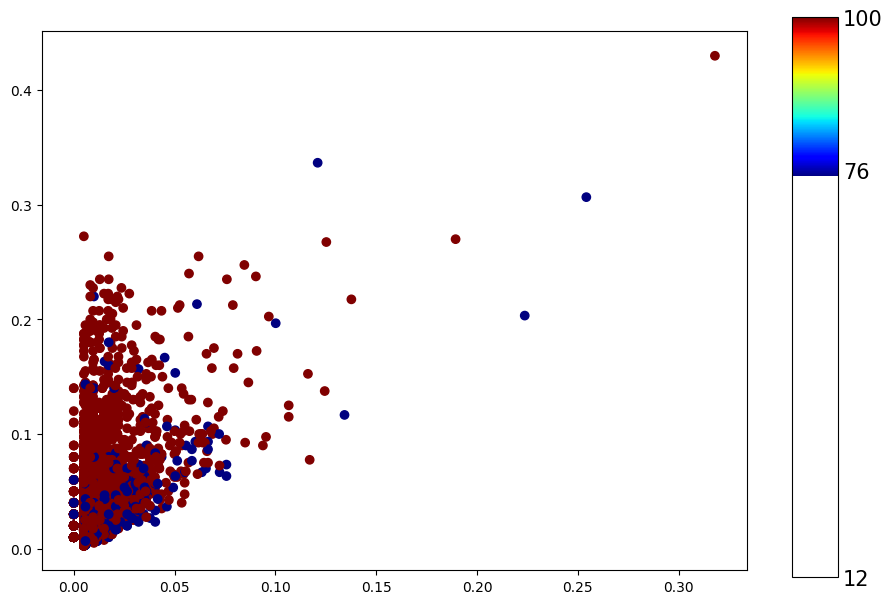

In [24]:
sensor_analysis.plot_mean_vs_std(valid_dataframe)

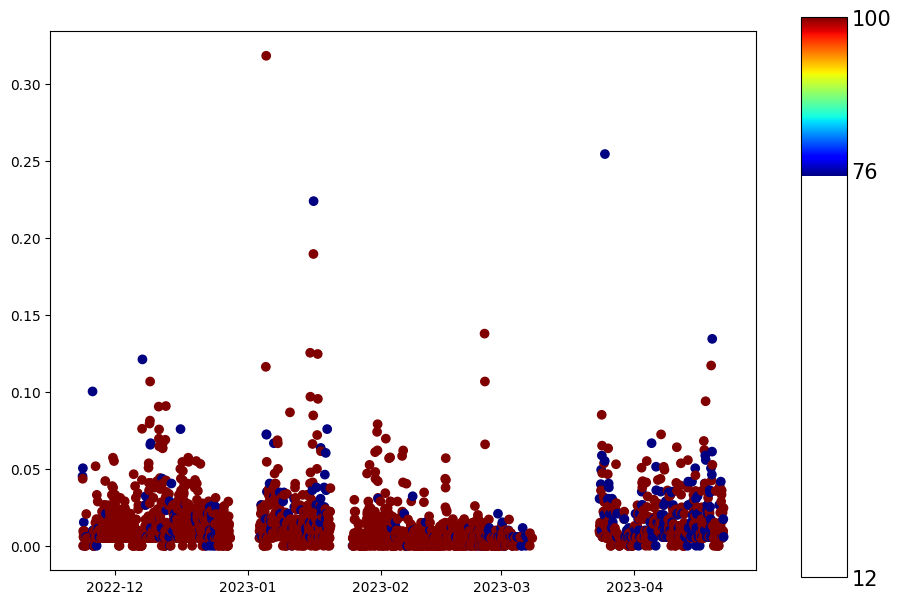

In [25]:
sensor_analysis.plot_std_in_time(valid_dataframe)

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorDataAnalysisService.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Hour'].astype('int64')


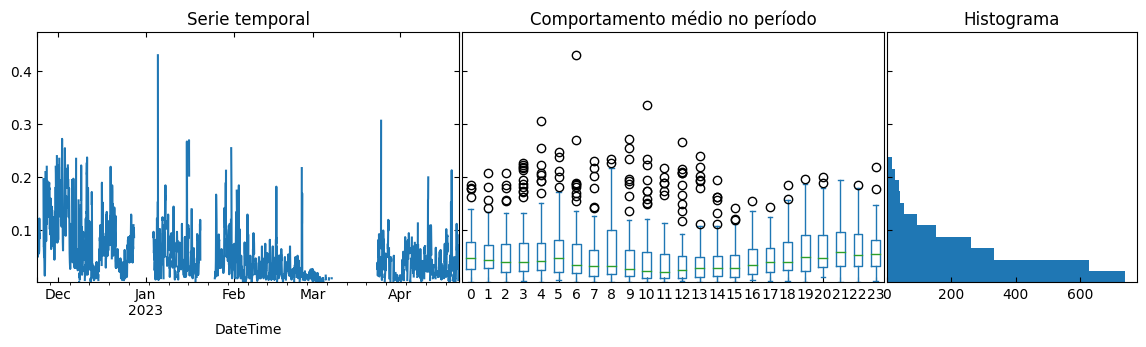

In [26]:
sensor_analysis.plot_box_hist(valid_dataframe, 20)

## Save Data

In [27]:
pm1_conc_data.save_to_csv()